In [2]:
# NAME :- AKULA HEMA VENKATA SRIRAM
# ROLL NO :- 04
# REGISTRATION NO :- 12210461
# SECTION :- K22BW
# COURSE CODE :- INT-354

# --------------------------------------------------------------------------------------------------------------------------------------------------------
# PROJECT TITLE :- Analyzing Machine Learning Models for Human Activity Recognition: A Comparative Study
# --------------------------------------------------------------------------------------------------------------------------------------------------------

Reading The Dataset

In [3]:
import pandas as pd
data=pd.read_csv('accelerometer_gyro_mobile_phone_dataset.csv')
data.head()

,accX,accY,accZ,gyroX,gyroY,gyroZ,timestamp,Activity
0,-0.496517,3.785628,8.954828,-0.142849,-0.126159,-0.022539,34:22.9,1
1,-0.462388,3.869603,9.281898,0.084349,0.096695,0.092130,34:23.0,1
2,-0.296084,3.820505,8.930728,0.061763,0.051543,0.071287,34:23.1,1
3,-0.469723,3.890110,8.744067,0.007641,0.028679,0.109433,34:23.2,1
4,-0.472418,4.109105,8.941207,-0.123640,0.099057,0.051943,34:23.3,1


Data Exploration and Preprocessing

In [4]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

# Check the shape of the dataset
print("\nShape of the dataset:")
print(data.shape)

First few rows of the dataset:
       accX      accY      accZ     gyroX     gyroY     gyroZ timestamp  \
0 -0.496517  3.785628  8.954828 -0.142849 -0.126159 -0.022539   34:22.9   
1 -0.462388  3.869603  9.281898  0.084349  0.096695  0.092130   34:23.0   
2 -0.296084  3.820505  8.930728  0.061763  0.051543  0.071287   34:23.1   
3 -0.469723  3.890110  8.744067  0.007641  0.028679  0.109433   34:23.2   
4 -0.472418  4.109105  8.941207 -0.123640  0.099057  0.051943   34:23.3   

   Activity  
0         1  
1         1  
2         1  
3         1  
4         1  

Shape of the dataset:
(31991, 8)


Check For Missing Values

In [5]:
print("Missing values:")
print(data.isnull().sum())

Missing values:
accX         0
accY         0
accZ         0
gyroX        0
gyroY        0
gyroZ        0
timestamp    0
Activity     0
dtype: int64


In [6]:
# Check unique values in the 'activity' column
print("Unique activities:")
print(data['Activity'].unique())

Unique activities:
[1 0]


In [7]:
# Summary statistics of numerical columns
print("Summary statistics:")
print(data.describe())


Summary statistics:
               accX          accY          accZ         gyroX         gyroY  \
count  31991.000000  31991.000000  31991.000000  31991.000000  31991.000000   
mean       0.023825      2.153858      9.537909     -0.004493     -0.014756   
std        0.741396      1.085466      2.056358      0.307643      0.249201   
min       -3.673361     -4.386029      4.296066     -1.470421     -1.430659   
25%       -0.472193      1.413062      7.794217     -0.149783     -0.162656   
50%       -0.024998      2.119143      9.406739      0.022301     -0.011060   
75%        0.477208      2.928435     11.158845      0.177978      0.124966   
max        4.678671      6.377039     17.591568      1.332722      1.480135   

              gyroZ      Activity  
count  31991.000000  31991.000000  
mean      -0.007021      0.982151  
std        0.266120      0.132404  
min       -1.894102      0.000000  
25%       -0.154126      1.000000  
50%        0.005261      1.000000  
75%        0.152

Scaling

In [8]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Scaling numerical features
# We'll scale the accelerometer and gyroscope signals using StandardScaler
scaler = StandardScaler()
numerical_cols = [
    'accX', 'accY', 'accZ', 
    'gyroX', 'gyroY', 'gyroZ'
]

data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Display the first few rows of the updated dataset with new features and preprocessed data
print("Updated dataset after preprocessing:")
print(data.head())


Updated dataset after preprocessing:
       accX      accY      accZ     gyroX     gyroY     gyroZ timestamp  \
0 -0.701852  1.503313 -0.283555 -0.449734 -0.447050 -0.058313   34:22.9   
1 -0.655818  1.580678 -0.124499  0.288789  0.447239  0.372586   34:23.0   
2 -0.431503  1.535445 -0.295275  0.215371  0.266049  0.294263   34:23.1   
3 -0.665712  1.599570 -0.386049  0.039444  0.174298  0.437607   34:23.2   
4 -0.669347  1.801326 -0.290179 -0.387294  0.456717  0.221573   34:23.3   

   Activity  
0         1  
1         1  
2         1  
3         1  
4         1  


Check if the data is imbalanced

In [9]:
print(100*data['Activity'].value_counts()/len(data['Activity']))
print(data['Activity'].value_counts())

Activity
1    98.215123
0     1.784877
Name: count, dtype: float64
Activity
1    31420
0      571
Name: count, dtype: int64


Plotting Heatmap

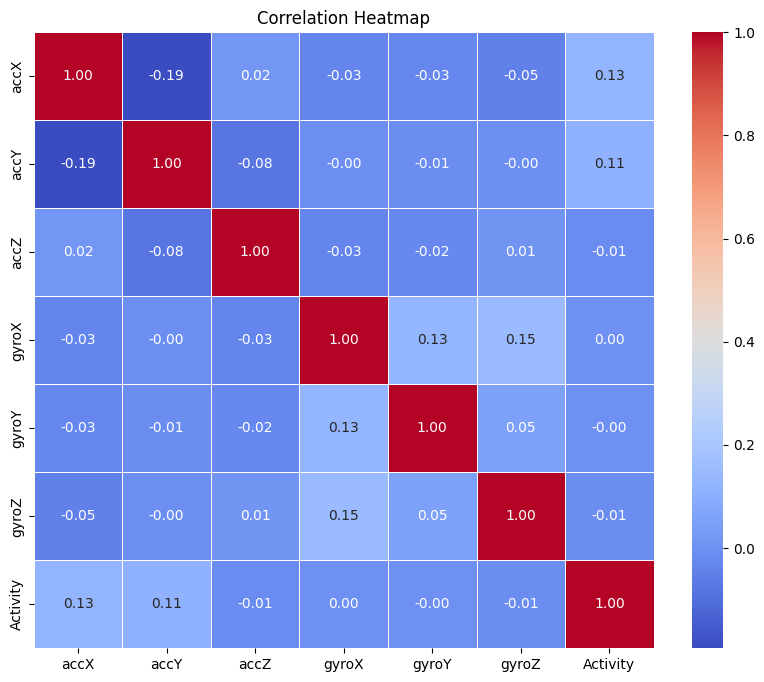

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Drop the 'timestamp' column
data = data.drop(columns=['timestamp'])

# Compute the correlation matrix
correlation_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f",linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [11]:
df=data.drop(columns=['gyroX','gyroY'])
df.head()

,accX,accY,accZ,gyroZ,Activity
0,-0.701852,1.503313,-0.283555,-0.058313,1
1,-0.655818,1.580678,-0.124499,0.372586,1
2,-0.431503,1.535445,-0.295275,0.294263,1
3,-0.665712,1.599570,-0.386049,0.437607,1
4,-0.669347,1.801326,-0.290179,0.221573,1


Model Training & Evaluation

Splitting data and target

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Split the data into features (X) and target (y)
X = df.drop(columns=['Activity'])  # Features
y = df['Activity']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Define the Random Forest Classifier with default hyperparameters
rf_classifier = RandomForestClassifier(random_state=42)  # Set random_state for reproducibility

# Train the model on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the model's performance
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))


Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.19      0.30       106
           1       0.99      1.00      0.99      6293

    accuracy                           0.99      6399
   macro avg       0.84      0.59      0.64      6399
weighted avg       0.98      0.99      0.98      6399


Confusion Matrix:
[[  20   86]
 [   9 6284]]


ReSampling

Activity
1    31420
0      571
Name: count, dtype: int64

After Resampling
Activity
0    30878
1    28973
Name: count, dtype: int64


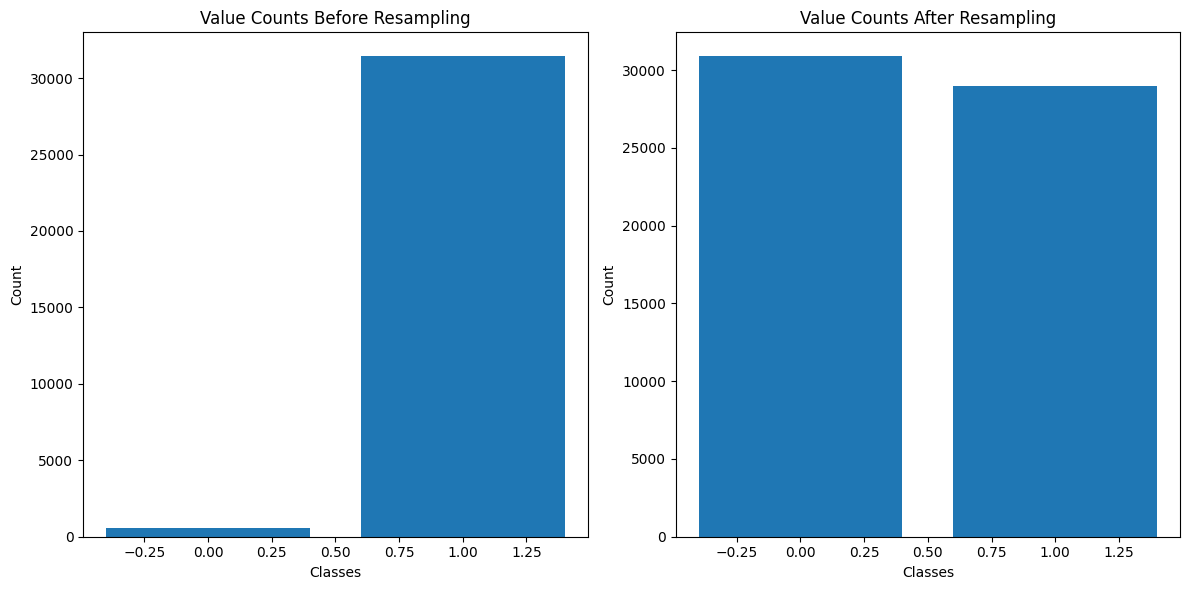

In [14]:
from imblearn.combine import SMOTEENN
sm=SMOTEENN()
X_resampled,Y_resampled=sm.fit_resample(X,y)
Xr_train,Xr_test,Yr_train,Yr_test=train_test_split(X_resampled,Y_resampled,test_size=0.2,random_state=42)
print(y.value_counts())
print("\nAfter Resampling")
print(Y_resampled.value_counts())

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot value counts before resampling
axs[0].bar(y.value_counts().index, y.value_counts().values)
axs[0].set_title('Value Counts Before Resampling')
axs[0].set_xlabel('Classes')
axs[0].set_ylabel('Count')

# Plot value counts after resampling
axs[1].bar(Y_resampled.value_counts().index, Y_resampled.value_counts().values)
axs[1].set_title('Value Counts After Resampling')
axs[1].set_xlabel('Classes')
axs[1].set_ylabel('Count')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

WITHOUT HYPERPARAMETER TUNING

Random Forest Classifier

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Define the Random Forest Classifier with default hyperparameters
rf_classifier = RandomForestClassifier(random_state=42)  # Set random_state for reproducibility

# Train the model on the training data
rf_classifier.fit(Xr_train, Yr_train)

# Make predictions on the testing data
Y_pred_rf = rf_classifier.predict(Xr_test)

# Evaluate the model's performance
print("Classification Report:")
print(classification_report(Yr_test, Y_pred_rf))

print("\nConfusion Matrix:")
print(confusion_matrix(Yr_test, Y_pred_rf))


Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      6107
           1       1.00      0.98      0.99      5864

    accuracy                           0.99     11971
   macro avg       0.99      0.99      0.99     11971
weighted avg       0.99      0.99      0.99     11971


Confusion Matrix:
[[6082   25]
 [ 100 5764]]


Decision Tree Classifier

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier

# Define pipeline with Decision Tree Classifier (default hyperparameters)
pipeline = Pipeline([
  ('classifier', DecisionTreeClassifier(random_state=42))
])

# Train the pipeline on the training data
pipeline.fit(Xr_train, Yr_train)

# Make predictions on the testing data
Y_pred_dt = pipeline.predict(Xr_test)

# Evaluate the model's performance
print("\nClassification Report:")
print(classification_report(Yr_test, Y_pred_dt))

print("\nConfusion Matrix:")
print(confusion_matrix(Yr_test, Y_pred_dt))



Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      6107
           1       0.99      0.98      0.98      5864

    accuracy                           0.98     11971
   macro avg       0.98      0.98      0.98     11971
weighted avg       0.98      0.98      0.98     11971


Confusion Matrix:
[[6020   87]
 [ 138 5726]]


Logistic Regression

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# Define pipeline with Logistic Regression (default hyperparameters)
pipeline = Pipeline([
  ('classifier', LogisticRegression(random_state=42))
])

# Train the pipeline on the training data
pipeline.fit(Xr_train, Yr_train)

# Make predictions on the testing data
Y_pred_lr = pipeline.predict(Xr_test)

# Evaluate the performance of the Logistic Regression model
print("\nClassification Report for Logistic Regression:")
print(classification_report(Yr_test, Y_pred_lr))

print("\nConfusion Matrix for Logistic Regression:")
print(confusion_matrix(Yr_test, Y_pred_lr))



Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      6107
           1       0.92      0.83      0.87      5864

    accuracy                           0.88     11971
   macro avg       0.89      0.88      0.88     11971
weighted avg       0.89      0.88      0.88     11971


Confusion Matrix for Logistic Regression:
[[5699  408]
 [ 990 4874]]


K Neighbors Classifier

In [18]:
from sklearn.neighbors import KNeighborsClassifier

# Define the pipeline with KNeighborsClassifier (default hyperparameters)
pipeline = Pipeline([
    ('classifier', KNeighborsClassifier())
])

# Train the pipeline on the training data
pipeline.fit(Xr_train, Yr_train)

# Make predictions on the testing data
Y_pred_knn = pipeline.predict(Xr_test)

# Evaluate the model's performance
print("\nClassification Report:")
print(classification_report(Yr_test, Y_pred_knn))

print("\nConfusion Matrix:")
print(confusion_matrix(Yr_test, Y_pred_knn))



Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      6107
           1       1.00      0.98      0.99      5864

    accuracy                           0.99     11971
   macro avg       0.99      0.99      0.99     11971
weighted avg       0.99      0.99      0.99     11971


Confusion Matrix:
[[6098    9]
 [ 120 5744]]


WITH HYPERPArAMETER TUNING - GRIDSEARCH

Decision tree classifier

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier

# Define pipeline with Decision Tree Classifier
pipeline = Pipeline([
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Define hyperparameters grid for grid search
param_grid = {
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(Xr_train, Yr_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Predict on the testing set using the best model
best_classifier = grid_search.best_estimator_
Y_pred_dt_grid = best_classifier.predict(Xr_test)

# Evaluate the model
print("\nClassification Report:")
print(classification_report(Yr_test, Y_pred_dt))

print("\nConfusion Matrix:")
print(confusion_matrix(Yr_test, Y_pred_dt))


Best Parameters: {'classifier__max_depth': 20, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2}

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      6107
           1       0.99      0.98      0.98      5864

    accuracy                           0.98     11971
   macro avg       0.98      0.98      0.98     11971
weighted avg       0.98      0.98      0.98     11971


Confusion Matrix:
[[6020   87]
 [ 138 5726]]


Logistic Regression

In [20]:
pipeline = Pipeline([
  ('classifier', LogisticRegression(random_state=42))  # Logistic Regression classifier
])

# Define hyperparameter grid for GridSearchCV
param_grid = {
  'classifier__C': [0.001, 0.01, 0.1, 1, 10],  # Specify a list of values for C
  'classifier__solver': ['lbfgs', 'liblinear']  # Solvers to try
}

# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(Xr_train, Yr_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Predict on the testing set using the best model
best_classifier = grid_search.best_estimator_
Y_pred_lr_grid = best_classifier.predict(Xr_test)

# Evaluate the performance of the Logistic Regression model
print("\nClassification Report for Logistic Regression:")
print(classification_report(Yr_test, Y_pred_lr))

print("\nConfusion Matrix for Logistic Regression:")
print(confusion_matrix(Yr_test, Y_pred_lr))


Best Parameters: {'classifier__C': 1, 'classifier__solver': 'lbfgs'}

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      6107
           1       0.92      0.83      0.87      5864

    accuracy                           0.88     11971
   macro avg       0.89      0.88      0.88     11971
weighted avg       0.89      0.88      0.88     11971


Confusion Matrix for Logistic Regression:
[[5699  408]
 [ 990 4874]]


WITH HYPERPARAMETERTUNING RANDOMIZEDSEARCHCV

Decision Tree Classifier

In [21]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import uniform, randint

# Define pipeline with Decision Tree Classifier
pipeline = Pipeline([
  ('classifier', DecisionTreeClassifier(random_state=42))
])

# Define hyperparameter distributions for RandomizedSearchCV
# Define hyperparameter distributions for RandomizedSearchCV
param_dist = {
  'classifier__criterion': ['gini', 'entropy'],  # Options for criterion
  'classifier__max_depth': randint(2, 20),       # Integer values between 2 and 20
  'classifier__min_samples_split': randint(2, 10),# Integer values between 2 and 10
  'classifier__min_samples_leaf': randint(1, 4)   # Integer values between 1 and 4
}


# Perform hyperparameter tuning using RandomizedSearchCV
random_dt = RandomizedSearchCV(estimator=pipeline, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_dt.fit(Xr_train, Yr_train)

# Get the best parameters
best_params = random_dt.best_params_
print("Best Parameters:", best_params)

# Predict on the testing set using the best model
best_classifier = random_dt.best_estimator_
Y_pred_dt_rand = best_classifier.predict(Xr_test)

# Evaluate the model
print("\nClassification Report:")
print(classification_report(Yr_test, Y_pred_dt)) 

print("\nConfusion Matrix:")
print(confusion_matrix(Yr_test, Y_pred_dt))


Best Parameters: {'classifier__criterion': 'entropy', 'classifier__max_depth': 16, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 4}

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      6107
           1       0.99      0.98      0.98      5864

    accuracy                           0.98     11971
   macro avg       0.98      0.98      0.98     11971
weighted avg       0.98      0.98      0.98     11971


Confusion Matrix:
[[6020   87]
 [ 138 5726]]


Logistic Regression

In [22]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from scipy.stats import uniform

# Define the pipeline
pipeline = Pipeline([
  ('classifier', LogisticRegression(random_state=42))  
])

# Define hyperparameters to search
param_dist = {
  'classifier__C': uniform(0.001, 10),  # Inverse regularization strength
  'classifier__solver': ['lbfgs', 'liblinear']  # Solvers to try
}

# Perform hyperparameter tuning using RandomizedSearchCV
random_lr = RandomizedSearchCV(estimator=pipeline, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_lr.fit(Xr_train, Yr_train)

# Get the best parameters
best_params = random_lr.best_params_
print("Best Parameters:", best_params)

# Predict on the testing set using the best model
best_classifier = random_lr.best_estimator_
Y_pred_lr_rand = best_classifier.predict(Xr_test)

# Evaluate the performance of the Logistic Regression model
print("\nClassification Report for Logistic Regression:")
print(classification_report(Yr_test, Y_pred_lr))

print("\nConfusion Matrix for Logistic Regression:")
print(confusion_matrix(Yr_test, Y_pred_lr))


Best Parameters: {'classifier__C': 3.746401188473625, 'classifier__solver': 'lbfgs'}

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      6107
           1       0.92      0.83      0.87      5864

    accuracy                           0.88     11971
   macro avg       0.89      0.88      0.88     11971
weighted avg       0.89      0.88      0.88     11971


Confusion Matrix for Logistic Regression:
[[5699  408]
 [ 990 4874]]


KNN

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import randint

# Define the pipeline
pipeline = Pipeline([ ('classifier', KNeighborsClassifier())])

param_dist = {
    'classifier__n_neighbors': randint(1, 20),  # Number of neighbors
    'classifier__p': [1, 2]  # Distance metric: 1 for Manhattan, 2 for Euclidean
}

# Perform hyperparameter tuning using RandomizedSearchCV
random_knn = RandomizedSearchCV(estimator=pipeline, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_knn.fit(Xr_train, Yr_train)

# Get the best parameters
best_params = random_knn.best_params_
print("Best Parameters:", best_params)

# Predict on the testing set using the best model
best_classifier = random_knn.best_estimator_
Y_pred_knn_rand = best_classifier.predict(Xr_test)

# Evaluate the model
print("\nClassification Report:")
print(classification_report(Yr_test, Y_pred_knn))

print("\nConfusion Matrix:")
print(confusion_matrix(Yr_test, Y_pred_knn))


Best Parameters: {'classifier__n_neighbors': 3, 'classifier__p': 2}

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      6107
           1       1.00      0.98      0.99      5864

    accuracy                           0.99     11971
   macro avg       0.99      0.99      0.99     11971
weighted avg       0.99      0.99      0.99     11971


Confusion Matrix:
[[6098    9]
 [ 120 5744]]


Comparing Scores

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate metrics for each model
dt_metrics = [accuracy_score(Yr_test, Y_pred_dt),  
              precision_score(Yr_test, Y_pred_dt, average='weighted'),
              recall_score(Yr_test, Y_pred_dt, average='weighted'),
              f1_score(Yr_test, Y_pred_dt, average='weighted')]

rf_metrics = [accuracy_score(Yr_test, Y_pred_rf), 
              precision_score(Yr_test, Y_pred_rf, average='weighted'),
              recall_score(Yr_test, Y_pred_rf, average='weighted'),
              f1_score(Yr_test, Y_pred_rf, average='weighted')]

knn_metrics = [accuracy_score(Yr_test, Y_pred_knn),  
              precision_score(Yr_test, Y_pred_knn, average='weighted'),
              recall_score(Yr_test, Y_pred_knn, average='weighted'),
              f1_score(Yr_test, Y_pred_knn, average='weighted')]

lr_metrics = [accuracy_score(Yr_test, Y_pred_lr), 
              precision_score(Yr_test, Y_pred_lr, average='weighted'),
              recall_score(Yr_test, Y_pred_lr, average='weighted'),
              f1_score(Yr_test, Y_pred_lr, average='weighted')]
# Metrics dataframe
metrics_df = pd.DataFrame([dt_metrics, rf_metrics, knn_metrics, lr_metrics],
                          columns=['Accuracy', 'Precision', 'Recall', 'F1-Score'],
                          index=['DecisionTreeClassifier', 'RandomForestClassifier', 'KNN', 'LogisticRegression'])

# Print the metrics
print("Metrics for DecisionTreeClassifier:")
print(metrics_df.loc['DecisionTreeClassifier'])
print("\nMetrics for RandomForestClassifier:")
print(metrics_df.loc['RandomForestClassifier'])
print("\nMetrics for KNN:")
print(metrics_df.loc['KNN'])
print("\nMetrics for Logistic Regression:")
print(metrics_df.loc['LogisticRegression'])

# Print the model with the best F1-score
best_model = metrics_df.idxmax()['Accuracy']
print("\nBest Model for the Project based on Accuracy:", best_model)


Metrics for DecisionTreeClassifier:
Accuracy     0.981205
Precision    0.981236
Recall       0.981205
F1-Score     0.981203
Name: DecisionTreeClassifier, dtype: float64

Metrics for RandomForestClassifier:
Accuracy     0.989558
Precision    0.989632
Recall       0.989558
F1-Score     0.989556
Name: RandomForestClassifier, dtype: float64

Metrics for KNN:
Accuracy     0.989224
Precision    0.989388
Recall       0.989224
F1-Score     0.989221
Name: KNN, dtype: float64

Metrics for Logistic Regression:
Accuracy     0.883218
Precision    0.886658
Recall       0.883218
F1-Score     0.882825
Name: LogisticRegression, dtype: float64

Best Model for the Project based on Accuracy: RandomForestClassifier


In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate metrics for each model
dt_metrics_grid = [accuracy_score(Yr_test, Y_pred_dt_grid), 
              precision_score(Yr_test, Y_pred_dt_grid, average='weighted'),
              recall_score(Yr_test, Y_pred_dt_grid, average='weighted'),
              f1_score(Yr_test, Y_pred_dt_grid, average='weighted')]

lr_metrics_grid = [accuracy_score(Yr_test, Y_pred_lr_grid),  
              precision_score(Yr_test, Y_pred_lr_grid, average='weighted'),
              recall_score(Yr_test, Y_pred_lr_grid, average='weighted'),
              f1_score(Yr_test, Y_pred_lr_grid, average='weighted')]

# Metrics dataframe
metrics_df_grid = pd.DataFrame([dt_metrics_grid,lr_metrics_grid],
                          columns=['Accuracy', 'Precision', 'Recall', 'F1-Score'],
                          index=['DecisionTreeClassifier_grid','LogisticRegression_grid'])

# Print the metrics
print("Metrics for DecisionTreeClassifier:")
print(metrics_df_grid.loc['DecisionTreeClassifier_grid'])
print("\nMetrics for Logistic Regression:")
print(metrics_df_grid.loc['LogisticRegression_grid'])

# Print the model with the best F1-score
best_model = metrics_df_grid.idxmax()['Accuracy']
print("\nBest Model for the Project based on Accuracy:", best_model)


Metrics for DecisionTreeClassifier:
Accuracy     0.981455
Precision    0.981532
Recall       0.981455
F1-Score     0.981452
Name: DecisionTreeClassifier_grid, dtype: float64

Metrics for Logistic Regression:
Accuracy     0.883218
Precision    0.886658
Recall       0.883218
F1-Score     0.882825
Name: LogisticRegression_grid, dtype: float64

Best Model for the Project based on Accuracy: DecisionTreeClassifier_grid


In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate metrics for each model
dt_metrics_rand = [accuracy_score(Yr_test, Y_pred_dt_rand),  
              precision_score(Yr_test, Y_pred_dt_rand, average='weighted'),
              recall_score(Yr_test, Y_pred_dt_rand, average='weighted'),
              f1_score(Yr_test, Y_pred_dt_rand, average='weighted')]
knn_metrics_rand = [accuracy_score(Yr_test, Y_pred_knn_rand),  
              precision_score(Yr_test, Y_pred_knn_rand, average='weighted'),
              recall_score(Yr_test, Y_pred_knn_rand, average='weighted'),
              f1_score(Yr_test, Y_pred_knn_rand, average='weighted')]

lr_metrics_rand = [accuracy_score(Yr_test, Y_pred_lr_rand),  
              precision_score(Yr_test, Y_pred_lr_rand, average='weighted'),
              recall_score(Yr_test, Y_pred_lr_rand, average='weighted'),
              f1_score(Yr_test, Y_pred_lr_rand, average='weighted')]
# Metrics dataframe
metrics_df_rand = pd.DataFrame([dt_metrics_rand, knn_metrics_rand, lr_metrics_rand],
                          columns=['Accuracy', 'Precision', 'Recall', 'F1-Score'],
                          index=['DecisionTreeClassifier_rand', 'KNN_rand', 'LogisticRegression_rand'])

# Print the metrics
print("Metrics for DecisionTreeClassifier:")
print(metrics_df_rand.loc['DecisionTreeClassifier_rand'])
print("\nMetrics for KNN:")
print(metrics_df_rand.loc['KNN_rand'])
print("\nMetrics for Logistic Regression:")
print(metrics_df_rand.loc['LogisticRegression_rand'])

# Print the model with the best F1-score
best_model = metrics_df_rand.idxmax()['Accuracy']
print("\nBest Model for the Project based on Accuracy:", best_model)


Metrics for DecisionTreeClassifier:
Accuracy     0.981372
Precision    0.981497
Recall       0.981372
F1-Score     0.981367
Name: DecisionTreeClassifier_rand, dtype: float64

Metrics for KNN:
Accuracy     0.993985
Precision    0.994034
Recall       0.993985
F1-Score     0.993985
Name: KNN_rand, dtype: float64

Metrics for Logistic Regression:
Accuracy     0.883218
Precision    0.886658
Recall       0.883218
F1-Score     0.882825
Name: LogisticRegression_rand, dtype: float64

Best Model for the Project based on Accuracy: KNN_rand


Accuracy Visualization

RandomizedSearchCv

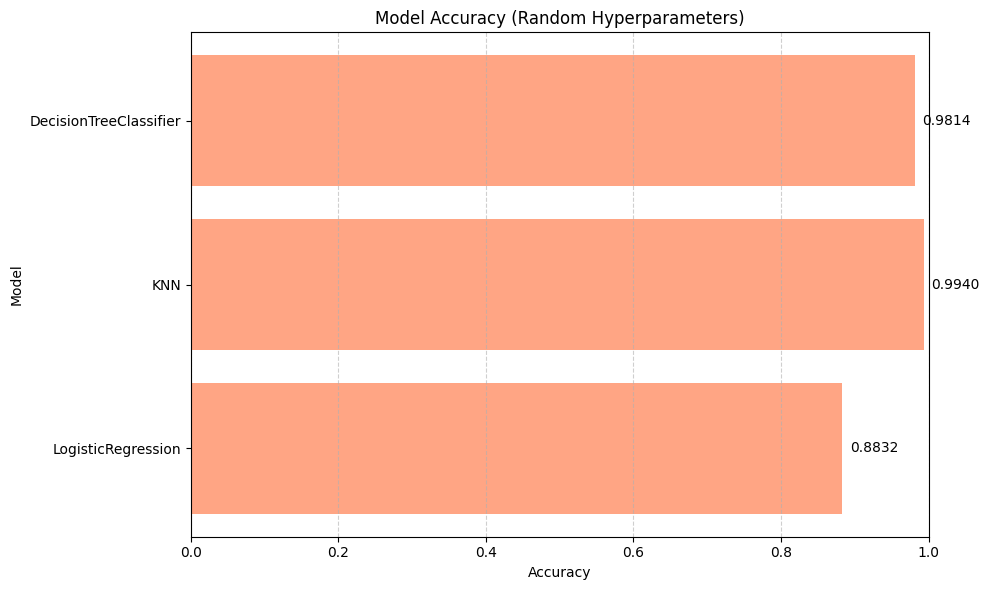

In [27]:
from sklearn.metrics import accuracy_score

# Calculate accuracy for each model
dt_accuracy_rand = accuracy_score(Yr_test, Y_pred_dt_rand)
knn_accuracy_rand = accuracy_score(Yr_test, Y_pred_knn_rand)
lr_accuracy_rand = accuracy_score(Yr_test, Y_pred_lr_rand)

# Create the accuracy_rand list
accuracy_rand = [dt_accuracy_rand, knn_accuracy_rand, lr_accuracy_rand]

# Model names list
model_names_rand = ['DecisionTreeClassifier', 'KNN', 'LogisticRegression']


import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(model_names_rand, accuracy_rand, color='coral', alpha=0.7)
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.title('Model Accuracy (Random Hyperparameters)')
plt.gca().invert_yaxis()  # Invert y-axis for readability (highest accuracy on top)
plt.xlim(0, 1)
for i, v in enumerate(accuracy_rand):
    plt.text(v + 0.01, i, f"{v:.4f}", va='center', ha='left', fontsize=10)  # Adjust offset and precision as needed

plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


GridSearchCv

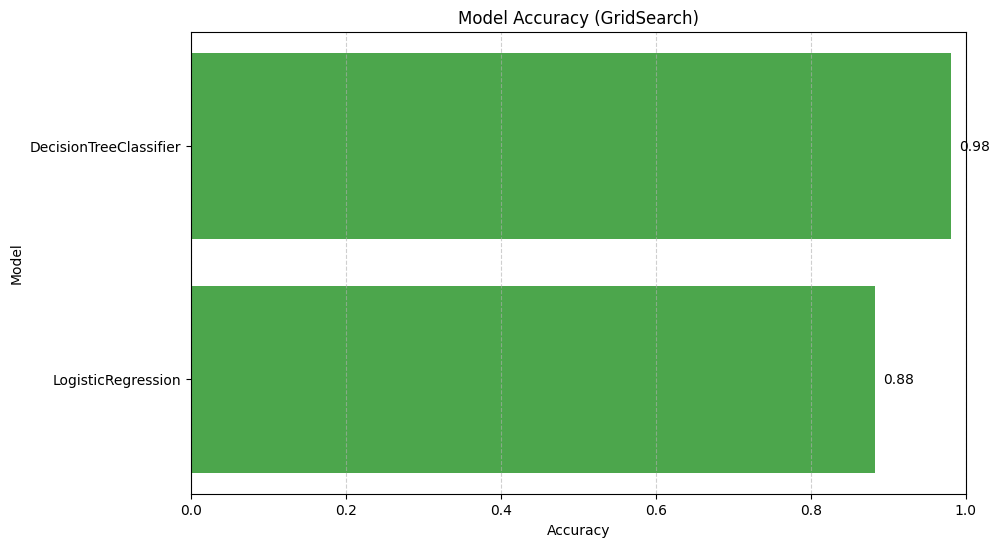

In [28]:
from sklearn.metrics import accuracy_score

# Calculate accuracy for each model
dt_accuracy_grid = accuracy_score(Yr_test, Y_pred_dt_grid)
lr_accuracy_grid = accuracy_score(Yr_test, Y_pred_lr_grid)

# Create the accuracy_rand list
accuracy_grid = [dt_accuracy_grid, lr_accuracy_grid]

# Model names list
model_names_grid = ['DecisionTreeClassifier', 'LogisticRegression']


import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(model_names_grid, accuracy_grid, color='green', alpha=0.7)
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.title('Model Accuracy (GridSearch)')
plt.gca().invert_yaxis()
plt.xlim(0, 1)
for i, v in enumerate(accuracy_grid):
    plt.text(v + 0.01, i, f"{v:.2f}", va='center', ha='left', fontsize=10)  # Adjust offset and precision as needed

plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()


Without Hyperparameter tuning

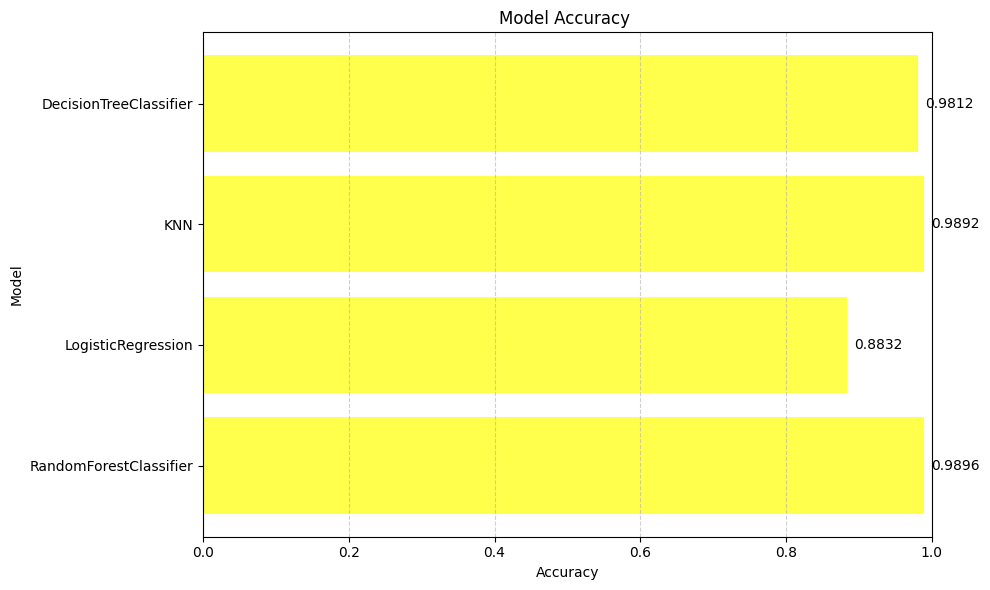

In [29]:
from sklearn.metrics import accuracy_score

# Calculate accuracy for each model
dt_accuracy = accuracy_score(Yr_test, Y_pred_dt)
knn_accuracy = accuracy_score(Yr_test, Y_pred_knn)
lr_accuracy = accuracy_score(Yr_test, Y_pred_lr)
rf_accuracy = accuracy_score(Yr_test,Y_pred_rf)

# Create the accuracy_rand list
accuracy = [dt_accuracy, knn_accuracy, lr_accuracy,rf_accuracy]

# Model names list
model_names = ['DecisionTreeClassifier', 'KNN', 'LogisticRegression','RandomForestClassifier']


import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(model_names, accuracy, color='yellow', alpha=0.7)
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.title('Model Accuracy ')
plt.gca().invert_yaxis()  # Invert y-axis for readability (highest accuracy on top)
plt.xlim(0, 1)
for i, v in enumerate(accuracy):
    plt.text(v + 0.01, i, f"{v:.4f}", va='center', ha='left', fontsize=10)  # Adjust offset and precision as needed

plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


BEST MODEL

In [30]:
# Combine the three dataframes
combined_metrics_df = pd.concat([metrics_df_rand, metrics_df_grid, metrics_df])

# Find the model with the highest accuracy
best_model = combined_metrics_df['Accuracy'].idxmax()

print(f"Best model based on accuracy: {best_model}")


Best model based on accuracy: KNN_rand
